### 전화사기(행정동) 분석

In [1]:
# /content/drive/MyDrive/Colab Notebooks/boostcourse/부스트코스 프로젝트/전화사기(행정동)_2019.2021/KPU_18_20191231_C_001.csv

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [3]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [4]:
import os
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [5]:
# 열 이름 추가하기

df1 = pd.read_csv('project_data/KPU_18_20191231_C_001.csv',encoding="utf-8", header = None, names=['기준년도','시도','시군구','행정동','인구','신고성별남성','신고성별여성','신고성별불상','신고성별기타','접수긴급유형긴급','접수긴급유형중요','접수긴급유형일반','접수긴급유형민원','접수긴급유형기타',
             '발생요일일요일','발생요일월요일','발생요일화요일','발생요일수요일','발생요일목요일','발생요일금요일','발생요일토요일',
             '발생시간대00','발생시간대01','발생시간대02','발생시간대03','발생시간대04','발생시간대05','발생시간대06','발생시간대07','발생시간대08',
             '발생시간대09','발생시간대10','발생시간대11','발생시간대12','발생시간대13','발생시간대14','발생시간대15','발생시간대16','발생시간대17',
             '발생시간대18', '발생시간대19','발생시간대20','발생시간대21','발생시간대22','발생시간대23'])
df2 = pd.read_csv('project_data/KPU_18_20201231_C_001.csv',encoding="utf-8",header = None, names=['기준년도','시도','시군구','행정동','인구','신고성별남성','신고성별여성','신고성별불상','신고성별기타','접수긴급유형긴급','접수긴급유형중요','접수긴급유형일반','접수긴급유형민원','접수긴급유형기타',
             '발생요일일요일','발생요일월요일','발생요일화요일','발생요일수요일','발생요일목요일','발생요일금요일','발생요일토요일',
             '발생시간대00','발생시간대01','발생시간대02','발생시간대03','발생시간대04','발생시간대05','발생시간대06','발생시간대07','발생시간대08',
             '발생시간대09','발생시간대10','발생시간대11','발생시간대12','발생시간대13','발생시간대14','발생시간대15','발생시간대16','발생시간대17',
             '발생시간대18', '발생시간대19','발생시간대20','발생시간대21','발생시간대22','발생시간대23'])
df3 = pd.read_csv('project_data/KPU_18_20211231_C_001.csv',encoding="utf-8",header = None, names=['기준년도','시도','시군구','행정동','인구','신고성별남성','신고성별여성','신고성별불상','신고성별기타','접수긴급유형긴급','접수긴급유형중요','접수긴급유형일반','접수긴급유형민원','접수긴급유형기타',
             '발생요일일요일','발생요일월요일','발생요일화요일','발생요일수요일','발생요일목요일','발생요일금요일','발생요일토요일',
             '발생시간대00','발생시간대01','발생시간대02','발생시간대03','발생시간대04','발생시간대05','발생시간대06','발생시간대07','발생시간대08',
             '발생시간대09','발생시간대10','발생시간대11','발생시간대12','발생시간대13','발생시간대14','발생시간대15','발생시간대16','발생시간대17',
             '발생시간대18', '발생시간대19','발생시간대20','발생시간대21','발생시간대22','발생시간대23'])

In [6]:
df1['신고성별기타'].value_counts()

0      3938
418       1
Name: 신고성별기타, dtype: int64

In [8]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
3939+4235+4567

(3939, 45)
(4235, 45)
(4567, 45)


12741

In [9]:
# concat 함수 -> 데이터프레임 이어붙이기 // axis = 0 -> 위,아래로 이어붙이기
# ignore_index=True -> 행 인덱스 번호 재배열
df = pd.concat([df1,df2], axis=0, ignore_index=True)

In [10]:
df.shape

(8174, 45)

In [11]:
df =  pd.concat([df,df3],axis=0, ignore_index=True)

In [12]:
df.shape

(12741, 45)

In [13]:
df

,기준년도,시도,시군구,행정동,인구,신고성별남성,신고성별여성,신고성별불상,신고성별기타,접수긴급유형긴급,...,발생시간대14,발생시간대15,발생시간대16,발생시간대17,발생시간대18,발생시간대19,발생시간대20,발생시간대21,발생시간대22,발생시간대23
0,2019,ETC,ETC,ETC,100352,55488,43391,1055,418,316,...,10234,7804,6322,5419,4261,3011,2255,1756,1322,914
1,2019,광주광역시,광산구,우산동,41,17,20,4,0,0,...,2,3,2,5,0,0,0,0,2,2
2,2019,경기도,성남시 수정구,복정동,40,15,20,5,0,0,...,1,4,2,1,4,2,1,0,0,1
3,2019,서울특별시,노원구,상계동,380,156,190,34,0,9,...,26,35,22,14,14,8,12,8,2,3
4,2019,서울특별시,양천구,신월동,205,105,84,16,0,5,...,16,17,13,11,3,5,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,2021,대전광역시,서구,평촌동,2,0,2,0,0,0,...,0,0,0,2,0,0,0,0,0,0
12737,2021,충청북도,괴산군,감물면,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12738,2021,인천광역시,중구,중앙동2가,2,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12739,2021,경상남도,창원시 마산합포구,장군동3가,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년도      12741 non-null  int64 
 1   시도        12741 non-null  object
 2   시군구       12741 non-null  object
 3   행정동       12741 non-null  object
 4   인구        12741 non-null  int64 
 5   신고성별남성    12741 non-null  int64 
 6   신고성별여성    12741 non-null  int64 
 7   신고성별불상    12741 non-null  int64 
 8   신고성별기타    12741 non-null  int64 
 9   접수긴급유형긴급  12741 non-null  int64 
 10  접수긴급유형중요  12741 non-null  int64 
 11  접수긴급유형일반  12741 non-null  int64 
 12  접수긴급유형민원  12741 non-null  int64 
 13  접수긴급유형기타  12741 non-null  int64 
 14  발생요일일요일   12741 non-null  int64 
 15  발생요일월요일   12741 non-null  int64 
 16  발생요일화요일   12741 non-null  int64 
 17  발생요일수요일   12741 non-null  int64 
 18  발생요일목요일   12741 non-null  int64 
 19  발생요일금요일   12741 non-null  int64 
 20  발생요일토요일   12741 non-null  int64 
 21  발생시간대00   12

In [15]:
df.describe()

,기준년도,인구,신고성별남성,신고성별여성,신고성별불상,신고성별기타,접수긴급유형긴급,접수긴급유형중요,접수긴급유형일반,접수긴급유형민원,...,발생시간대14,발생시간대15,발생시간대16,발생시간대17,발생시간대18,발생시간대19,발생시간대20,발생시간대21,발생시간대22,발생시간대23
count,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,...,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000,12741.000000
mean,2020.049290,68.145201,30.766894,32.718782,4.602464,0.036339,0.338278,4.415901,14.554352,23.199670,...,6.893650,6.053528,4.937054,4.078879,3.195981,2.321325,1.706852,1.274468,0.946551,0.636371
std,0.815617,1608.050050,794.068209,758.887640,67.573307,3.723617,3.778025,30.507012,93.467161,103.081733,...,159.122235,136.201912,114.037283,96.740572,77.635629,57.808612,42.053239,32.428759,23.707126,16.451461
min,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,10.000000,5.000000,4.000000,1.000000,0.000000,0.000000,1.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,37.000000,17.000000,17.000000,3.000000,0.000000,0.000000,4.000000,12.000000,16.000000,...,4.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2021.000000,125658.000000,57724.000000,60576.000000,7357.000000,418.000000,316.000000,1948.000000,7549.000000,6849.000000,...,12438.000000,11154.000000,9270.000000,7917.000000,6515.000000,4883.000000,3576.000000,2758.000000,1980.000000,1385.000000


In [16]:
df[df["행정동"]=="ETC"]

,기준년도,시도,시군구,행정동,인구,신고성별남성,신고성별여성,신고성별불상,신고성별기타,접수긴급유형긴급,...,발생시간대14,발생시간대15,발생시간대16,발생시간대17,발생시간대18,발생시간대19,발생시간대20,발생시간대21,발생시간대22,발생시간대23
0,2019,ETC,ETC,ETC,100352,55488,43391,1055,418,316,...,10234,7804,6322,5419,4261,3011,2255,1756,1322,914
6614,2020,ETC,ETC,ETC,83509,40055,41900,1248,44,138,...,7859,7070,6259,5178,3996,3090,2142,1634,1211,825
8175,2021,ETC,ETC,ETC,125658,57724,60576,7357,1,210,...,12438,11154,9270,7917,6515,4883,3576,2758,1980,1385


In [17]:
df = df.drop([df.index[0],df.index[6614],df.index[8175]])
df.shape
# (12738, 45) 로 결과가 나와야 함

(12738, 45)

In [18]:
# df[df["행정동"]=="ETC"]
# df = df.reset_index(drop=False)

In [19]:
df["시도"].value_counts()

경기도        2073
서울특별시      1378
경상남도       1365
경상북도       1256
전라북도        963
전라남도        933
충청남도        761
강원도         682
충청북도        547
대구광역시       543
부산광역시       529
광주광역시       411
인천광역시       411
대전광역시       396
울산광역시       214
제주특별자치도     201
세종특별자치시      75
Name: 시도, dtype: int64

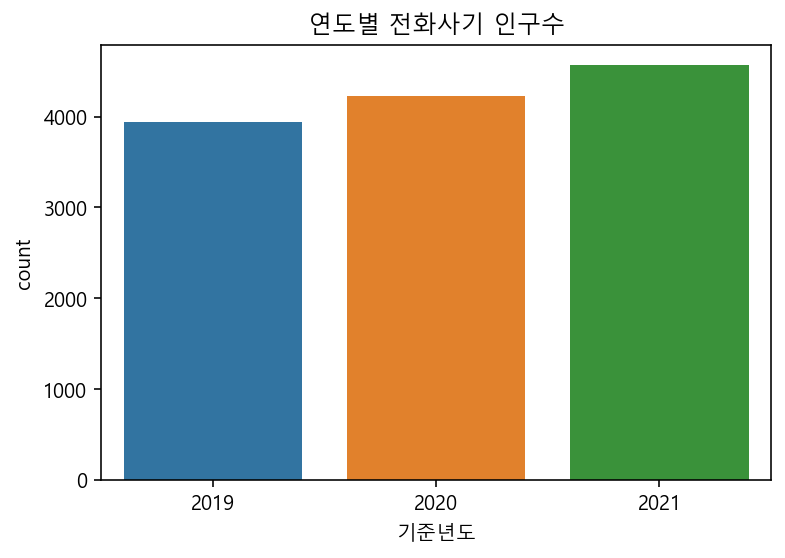

In [20]:
sns.countplot(x="기준년도", data = df)
plt.title("연도별 전화사기 인구수")
plt.show()

#### 시도별

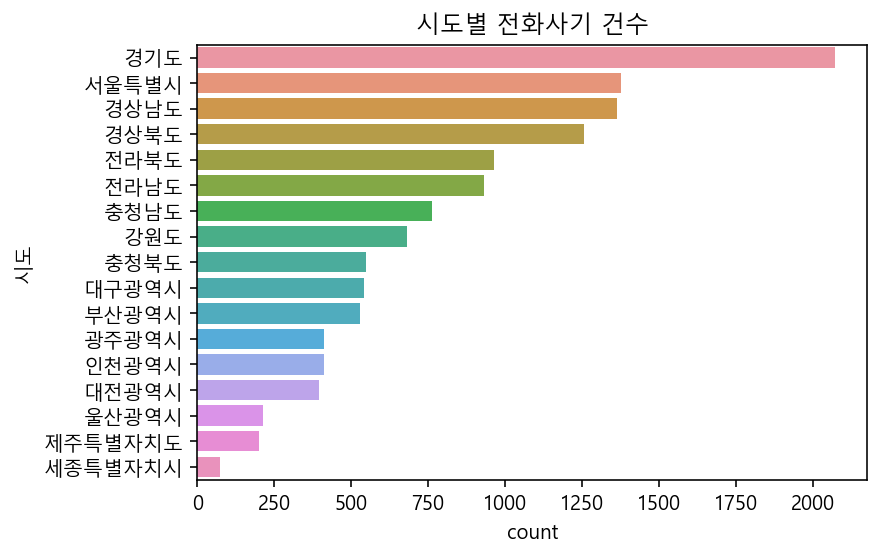

In [21]:
sns.countplot(y="시도", data = df, order = df["시도"].value_counts().index)
plt.title("시도별 전화사기 건수")
plt.show()

#### 시간대별

In [22]:
df_time = df.iloc[:,21:]
df_time

,발생시간대00,발생시간대01,발생시간대02,발생시간대03,발생시간대04,발생시간대05,발생시간대06,발생시간대07,발생시간대08,발생시간대09,...,발생시간대14,발생시간대15,발생시간대16,발생시간대17,발생시간대18,발생시간대19,발생시간대20,발생시간대21,발생시간대22,발생시간대23
1,0,1,0,0,0,0,0,0,0,6,...,2,3,2,5,0,0,0,0,2,2
2,0,0,0,0,0,0,0,0,0,2,...,1,4,2,1,4,2,1,0,0,1
3,3,2,0,1,0,0,1,0,6,26,...,26,35,22,14,14,8,12,8,2,3
4,1,2,0,0,0,2,1,1,5,17,...,16,17,13,11,3,5,2,4,2,3
5,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
12737,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
12738,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
time_sum = df_time.sum()
time_sum

발생시간대00     2935
발생시간대01     1898
발생시간대02     1154
발생시간대03      771
발생시간대04      637
발생시간대05      719
발생시간대06      990
발생시간대07     1921
발생시간대08     7349
발생시간대09    35888
발생시간대10    58236
발생시간대11    63847
발생시간대12    59779
발생시간대13    58752
발생시간대14    57301
발생시간대15    51100
발생시간대16    41052
발생시간대17    33455
발생시간대18    25948
발생시간대19    18592
발생시간대20    13774
발생시간대21    10090
발생시간대22     7547
발생시간대23     4984
dtype: int64

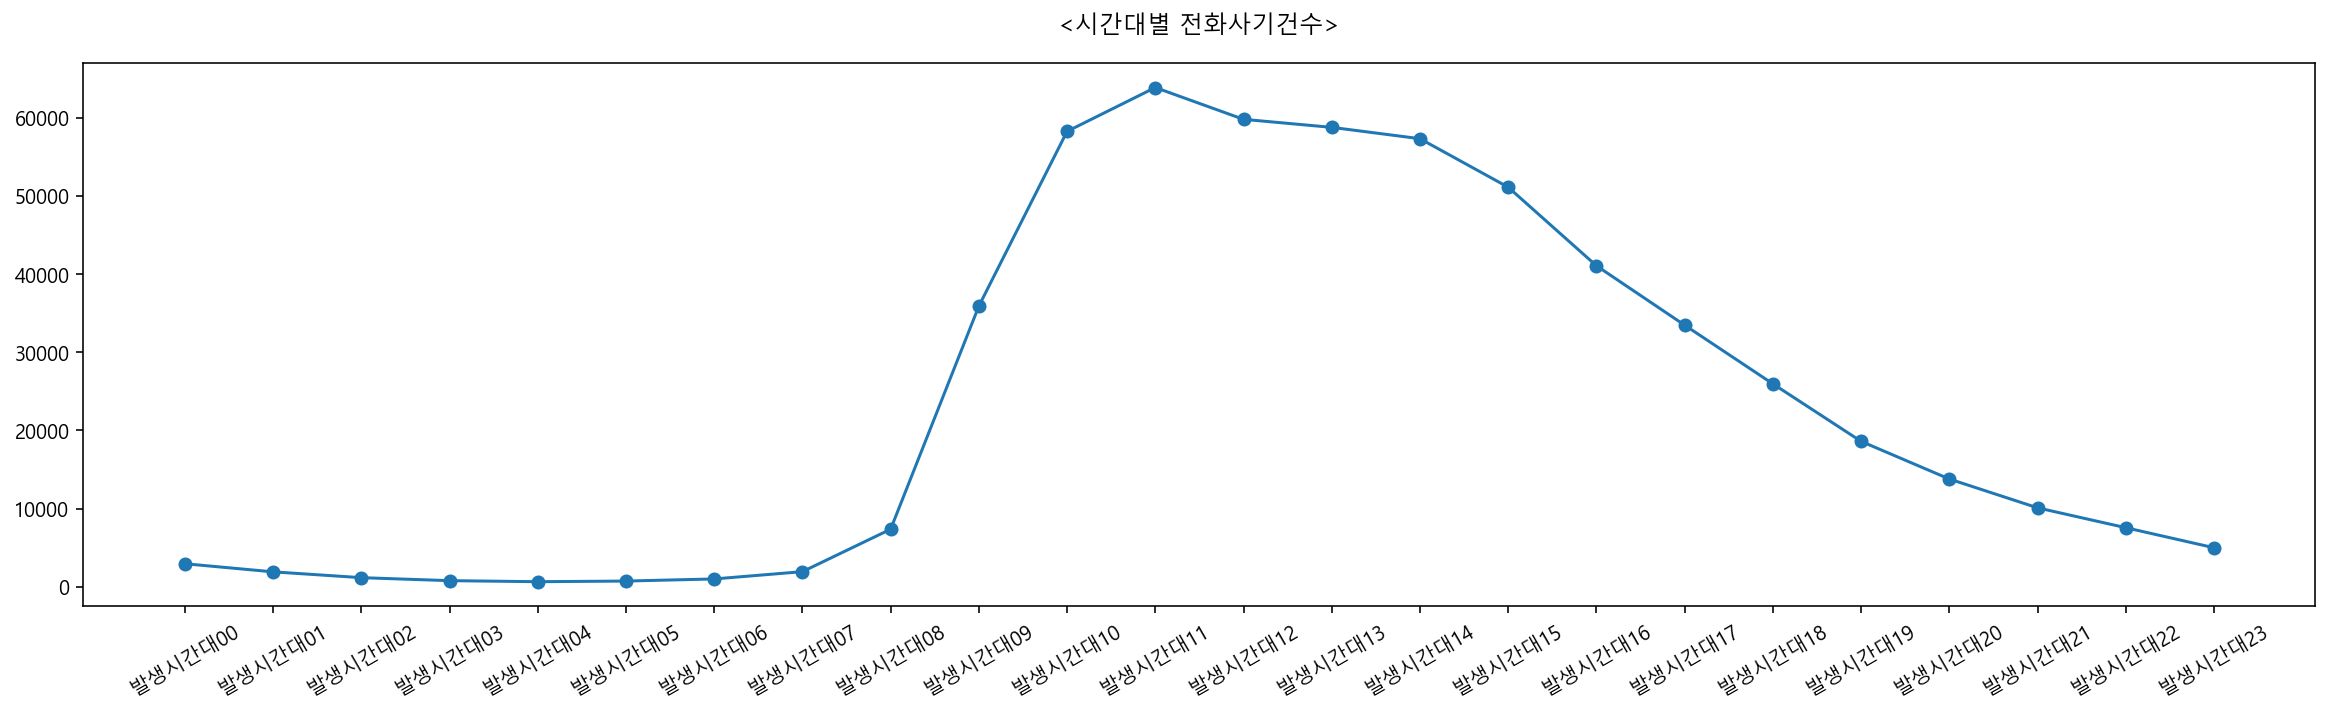

In [24]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=30)
plt.plot(time_sum, marker='o')

plt.title('<시간대별 전화사기건수>', pad=15)
plt.show()
# 11시~14시 사이의 전화사기건수가 가장 많음

#### 요일별

In [25]:
df_day = df.iloc[:,14:21]
df_day.head(3)

,발생요일일요일,발생요일월요일,발생요일화요일,발생요일수요일,발생요일목요일,발생요일금요일,발생요일토요일
1,0,10,3,9,12,6,1
2,1,7,13,5,5,7,2
3,3,60,91,73,70,77,6


In [26]:
df_day_sum = df_day.sum()
df_day_sum

발생요일일요일     15824
발생요일월요일     97875
발생요일화요일    104138
발생요일수요일    103259
발생요일목요일    105092
발생요일금요일     99828
발생요일토요일     32703
dtype: int64

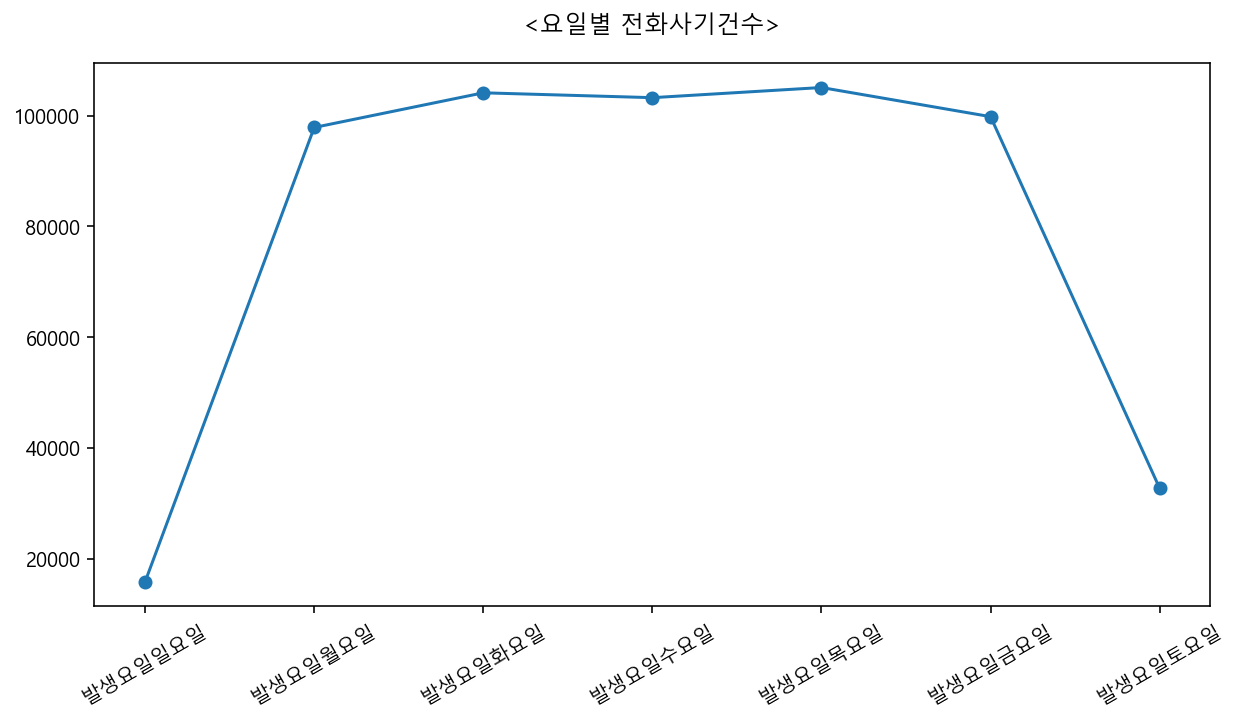

In [27]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=30)
plt.plot(df_day_sum, marker='o')

plt.title('<요일별 전화사기건수>', pad=15)
plt.show()
# 주말보다는 평일에 전화사기가 많이 일어남을 확인

#### 접수긴급유형긴급과 지역별

In [28]:
df_report_large = df.groupby(['시도'])['접수긴급유형긴급'].count()
df_report_large=pd.DataFrame(df_report_large)
df_report_large

,접수긴급유형긴급
시도,
강원도,682
경기도,2073
경상남도,1365
경상북도,1256
광주광역시,411
대구광역시,543
대전광역시,396
부산광역시,529
서울특별시,1378


<AxesSubplot:title={'center':'<시도별 접수긴급유형긴급 건수>'}, ylabel='시도'>

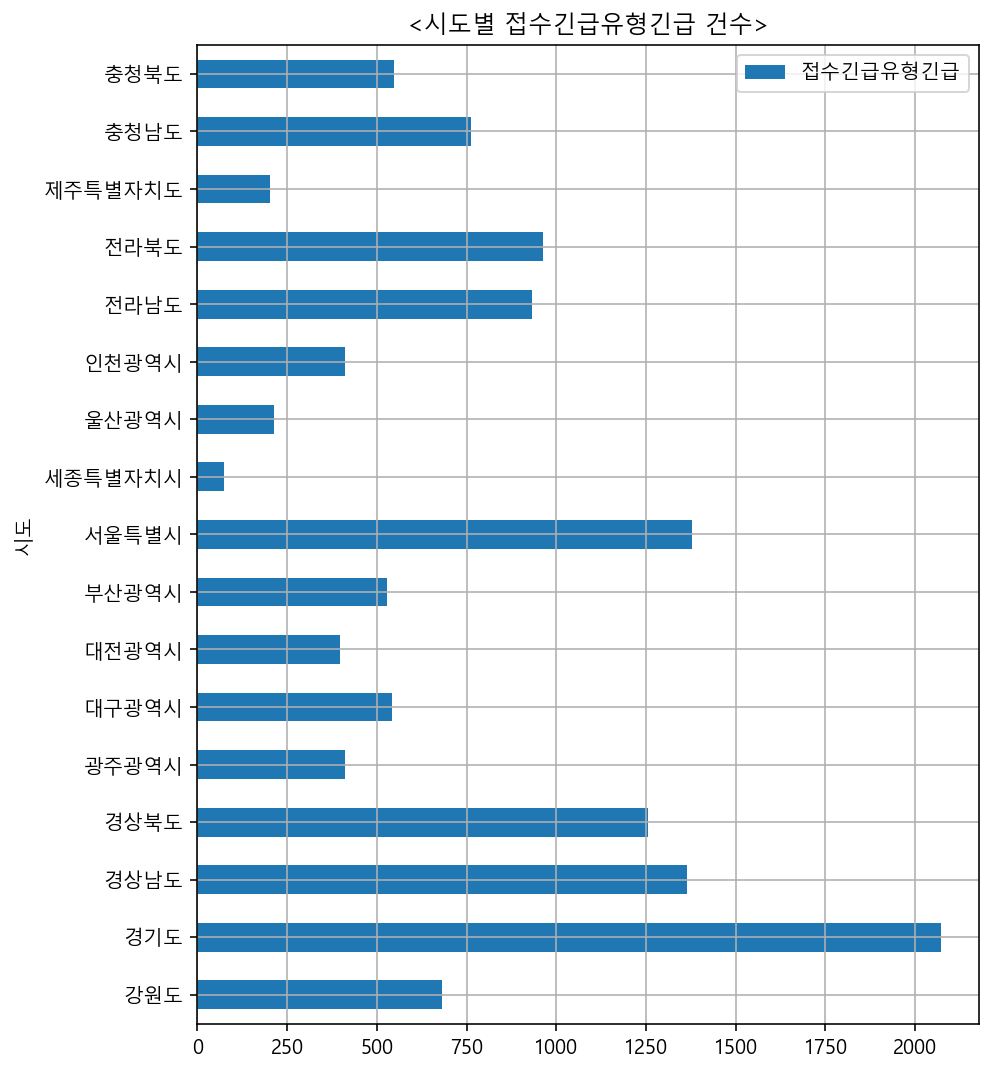

In [29]:
df_report_large.plot.barh(figsize =(7,9), grid = True, title='<시도별 접수긴급유형긴급 건수>')

In [30]:
df.columns

Index(['기준년도', '시도', '시군구', '행정동', '인구', '신고성별남성', '신고성별여성', '신고성별불상',
       '신고성별기타', '접수긴급유형긴급', '접수긴급유형중요', '접수긴급유형일반', '접수긴급유형민원', '접수긴급유형기타',
       '발생요일일요일', '발생요일월요일', '발생요일화요일', '발생요일수요일', '발생요일목요일', '발생요일금요일',
       '발생요일토요일', '발생시간대00', '발생시간대01', '발생시간대02', '발생시간대03', '발생시간대04',
       '발생시간대05', '발생시간대06', '발생시간대07', '발생시간대08', '발생시간대09', '발생시간대10',
       '발생시간대11', '발생시간대12', '발생시간대13', '발생시간대14', '발생시간대15', '발생시간대16',
       '발생시간대17', '발생시간대18', '발생시간대19', '발생시간대20', '발생시간대21', '발생시간대22',
       '발생시간대23'],
      dtype='object')

- 경기도 시군구별 접수긴급유형긴급이 가장 많은 지역 시각화

In [75]:
df_Gyeonggi = df[df['시도'] == '경기도'].copy()
df_Gyeonggi['시군구']

2         성남시 수정구
21            김포시
23            화성시
34        성남시 분당구
35        수원시 장안구
           ...   
12704         안성시
12714     용인시 처인구
12721    고양시 일산서구
12726     고양시 덕양구
12727         양주시
Name: 시군구, Length: 2073, dtype: object

In [81]:
series_Gyeonggi = df_Gyeonggi.groupby(['시군구'])['접수긴급유형긴급'].count()
df_Gyeonggi_1= pd.DataFrame(series_Gyeonggi)
df_Gyeonggi_1.head()

,접수긴급유형긴급
시군구,
가평군,18
고양시 덕양구,83
고양시 일산동구,38
고양시 일산서구,23
과천시,28


In [82]:
df_Gyeonggi_2 = df_Gyeonggi_1[df_Gyeonggi_1['접수긴급유형긴급']>70]
df_Gyeonggi_2

,접수긴급유형긴급
시군구,
고양시 덕양구,83
부천시,71
시흥시,86
안성시,115
여주시,78
이천시,72
파주시,89
평택시,106
화성시,112


<AxesSubplot:xlabel='시군구'>

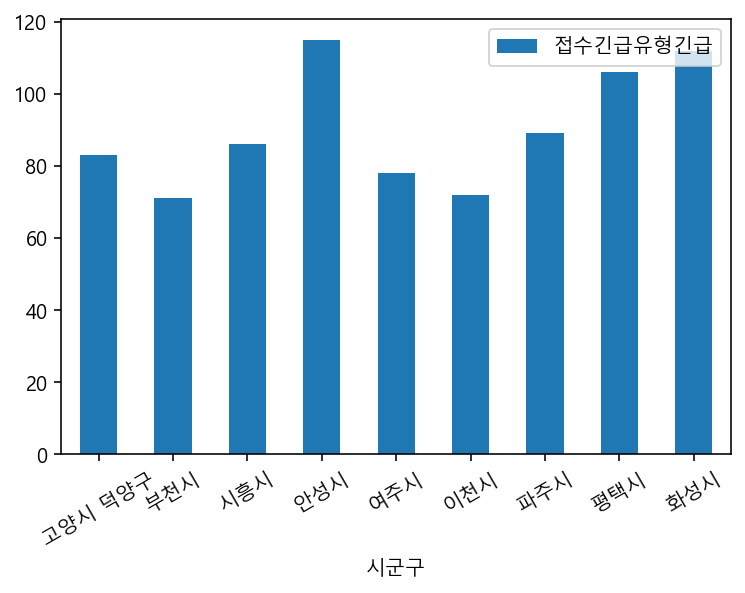

In [89]:
df_Gyeonggi_2.plot.bar(rot=30)